# 4.6 Lab: Logistic Regression, LDA, QDA, and KNN

In [50]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## 4.6.1 The Stock Market Data

In [2]:
data = pd.read_csv('E:\programming\dataset\Into_to_statstical_learning\Smarket.csv',index_col=0)
print(data.shape)
data.head()

(1250, 9)


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
data.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [4]:
data.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [5]:
#produces a correlation matrix for all the numrice columns 
corr = data.corr()
corr

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


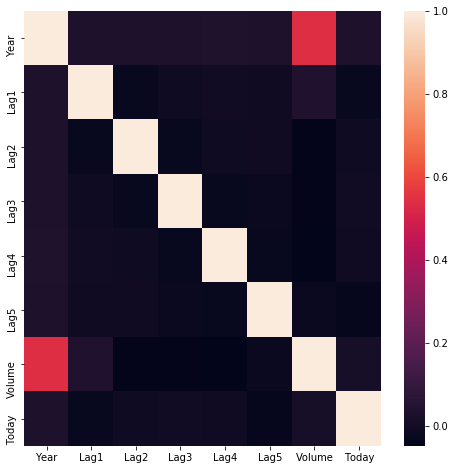

In [6]:
# the best way to visualize corerelations matrices is heatmap
plt.figure(figsize = (8,8))
sns.heatmap(corr)

#### We can see from the above figure that correlations between veriablesa excpet Volume and Year are close to zero.

In [7]:
print(corr.iloc[:,-2:])

          Volume     Today
Year    0.539006  0.030095
Lag1    0.040910 -0.026155
Lag2   -0.043383 -0.010250
Lag3   -0.041824 -0.002448
Lag4   -0.048414 -0.006900
Lag5   -0.022002 -0.034860
Volume  1.000000  0.014592
Today   0.014592  1.000000


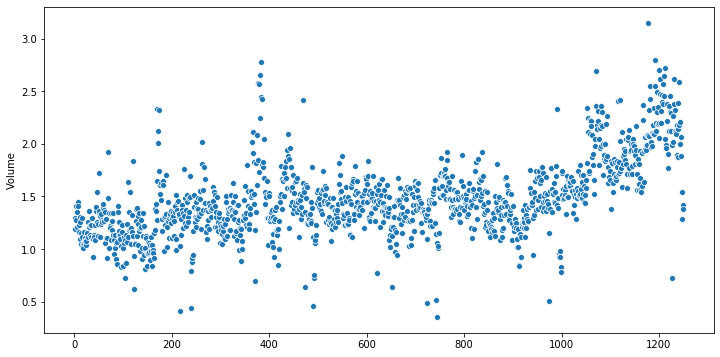

In [8]:
# we choose the x axis as index, chossing year will give a discrete plot
plt.figure(figsize = (12,6))
sns.scatterplot(data.index,data['Volume'])

## 4.6.2 Logistic Regression

In [9]:
#store a copy of the original data, as we are going to make some changes in the data
data_orig = data.copy()
data['Direction'] = data['Direction'].map({'Down':0,'Up':1})

In [10]:
#logit = sm.Logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data = data)
#the above line was giving error

X = data.iloc[:,1:-2]
X = sm.add_constant(X)
y = data['Direction']
results = sm.Logit(y,X).fit()
print(results.summary())

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 Jun 2020   Pseudo R-squ.:                0.002074
Time:                        09:31:47   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.

In [11]:
# probablitie that the given oberstaion will result in 'UP'
prob = results.predict(X)[:10]
print(list(prob))

predicted_classes = np.where(prob <=0.5,'Down','Up')
pd.DataFrame({'Probabilities':prob,'Classes':predicted_classes})

[0.5070841334630003, 0.48146787817516973, 0.4811388348131379, 0.515222355792766, 0.5107811625911516, 0.5069564604552573, 0.49265087386752915, 0.5092291581449722, 0.5176135261687922, 0.4888377794207712]


,Probabilities,Classes
1,0.507084,Up
2,0.481468,Down
3,0.481139,Down
4,0.515222,Up
5,0.510781,Up
6,0.506956,Up
7,0.492651,Down
8,0.509229,Up
9,0.517614,Up
10,0.488838,Down


In [12]:
# confusion matrix and accuracy
# Using sklearn
lr = LogisticRegression()
lr.fit(X,y)
lr.coef_
# we can see that sklearn and statsmodel, don't have the exact same coefficients

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[-0.05885099, -0.07281559, -0.0422629 ,  0.01098588,  0.00925089,
         0.01024626,  0.12995149]])

In [13]:
cm = confusion_matrix(y,lr.predict(X))
accuracy = accuracy_score(y,lr.predict(X))

print('Accuracy is ',accuracy)
print('confusion_matrix - ')
print(cm)


Accuracy is  0.5232
confusion_matrix - 
[[143 459]
 [137 511]]


NOTE - Confusion matrix drawn in the book has actual values as columns, and predicted values as rows.
       While in Sklearn, actual values are as rows, and predicted values are as columns

In [14]:
#using statsmodel
table = results.pred_table(threshold=0.5)
table

array([[145., 457.],
       [141., 507.]])

#### Computin train and test accuracy

In [15]:
train = data[data['Year']<2005]
test = data[data['Year'] == 2005]
print('Shape of train is',train.shape)
print('Shape of test is ',test.shape)

Shape of train is (998, 9)
Shape of test is  (252, 9)


In [16]:
X_train = train.iloc[:,1:-2]
X_train = sm.add_constant(X_train)
y_train = train['Direction']

X_test = test.iloc[:,1:-2]
X_test = sm.add_constant(X_test)
y_test = test['Direction']

C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
results = sm.Logit(y_train,X_train).fit()
pred_test = results.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


In [18]:
pred_classes = np.where(pred_test > 0.5,1,0)
cm = confusion_matrix(y_test,pred_classes)
cm

array([[77, 34],
       [97, 44]], dtype=int64)

In [19]:
accuracy = accuracy_score(y_test,pred_classes)
print('Accuracy is ',accuracy)

Accuracy is  0.4801587301587302


In [20]:
# The accuracy is just 48%, even random guessing will do a better job.

In [21]:
# Using only Lag1 and lag 2
predictors = ['Lag1','Lag2']
X_train = train[predictors]
X_train = sm.add_constant(X_train)

X_test = test[predictors]
X_test = sm.add_constant(X_test)
# y_train and y_test remains the same

In [22]:
results = sm.Logit(y_train,X_train).fit()
pred_test = results.predict(X_test)

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


In [23]:
pred_classes = np.where(pred_test > 0.5,1,0)
cm = confusion_matrix(y_test,pred_classes)
cm

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

In [24]:
accuracy = accuracy_score(y_test,pred_classes)
print('Accuracy is ',accuracy)

Accuracy is  0.5595238095238095


In [25]:
# the accuracy is better that before

In [26]:
# prediction
results.predict([[1,1.2,1.1],
                 [1,1.5,-0.8]])

array([0.47914624, 0.49609387])

## 4.6.3 Linear Discriment Analysis

In [27]:
# We use sklearn for LDA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

In [28]:
predictors = ['Lag1','Lag2']

X_train = train[predictors]
X_test = test[predictors]

lda = LDA()
# in the parameters we can also provide prior probabilities represented by pie in chapter
lda.fit(X_train,y_train)
pred = lda.predict(X_test)

In [29]:
print('Prior Probs are - ',lda.priors_)
print('Class Means are  - ',lda.means_)
print('Coeff are - ',lda.coef_)

# Mean is the average value of observations for each class

Prior Probs are -  [0.49198397 0.50801603]
Class Means are  -  [[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Coeff are -  [[-0.05544078 -0.0443452 ]]


In [30]:
cm = confusion_matrix(y_test,pred)
print(cm)

[[ 35  76]
 [ 35 106]]


In [31]:
print('Accuracy using LDA is ',accuracy_score(y_test,pred))

Accuracy using LDA is  0.5595238095238095


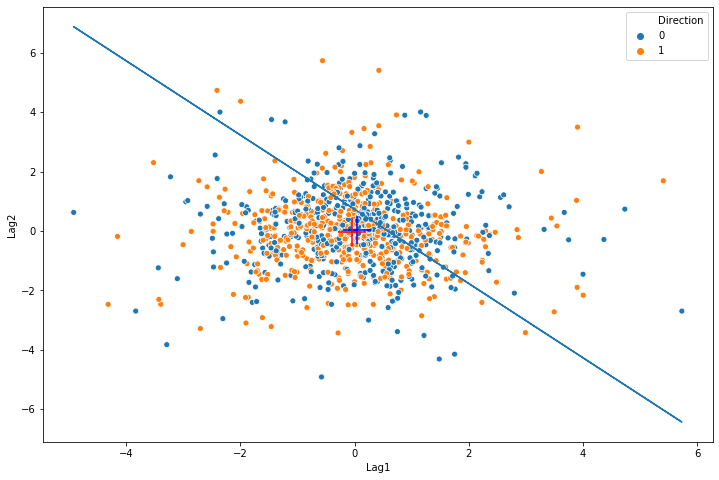

In [32]:
plt.figure(figsize = (12,8))
tmp = pd.DataFrame({'Lag1':X_train['Lag1'],'Lag2':X_train['Lag2'],'Direction':y_train})
sns.scatterplot(y = 'Lag2',x = 'Lag1',hue = 'Direction',data = tmp)

x1 = X_train['Lag1']
b, w1, w2 = lda.intercept_[0], lda.coef_[0][0], lda.coef_[0][1]
y1 = -(b+x1*w1)/w2    
plt.plot(x1,y1)

#mean 
plt.scatter(lda.means_[0][0],lda.means_[0][1],marker = "+",color = 'blue',s = 800)
plt.scatter(lda.means_[1][0],lda.means_[1][1],marker = "+",color = 'red',s = 800)

## 4.6.4 Quadratic Discriminant Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

In [33]:
qda = QDA()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [34]:
print('Mean for class 0 is - ',qda.means_[0])
print('Mean for class 1 is - ',qda.means_[1])
print('Prior probalbilities - ',qda.priors_)

Mean for class 0 is -  [0.04279022 0.03389409]
Mean for class 1 is -  [-0.03954635 -0.03132544]
Prior probalbilities -  [0.49198397 0.50801603]


In [35]:
pred = qda.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)

[[ 30  81]
 [ 20 121]]


In [36]:
print('Accuracy using QDA is ',accuracy_score(y_test,pred))

Accuracy using QDA is  0.5992063492063492


In [37]:
# QDA has the best performance with almost 60% accuracy
# We can see from the graph that there is no possible linear spearation, and non linear models will perform better

## 4.6.5 K-Nearest Neighbors

In [38]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [39]:
pred = knn.predict(X_test)


In [40]:
print('Accuracy using KNN for 1 nieghbor is ',accuracy_score(y_test,pred))

Accuracy using KNN for 1 nieghbor is  0.5


In [41]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Accuracy using KNN for 1 nieghbor is ',accuracy_score(y_test,pred))

Accuracy using KNN for 1 nieghbor is  0.5317460317460317


In [42]:
# Even if we increase n to 3, accuracy is 53.17

## 4.6.6 An Application to Caravan Insurance Data


In [46]:
data = pd.read_csv('E:\programming\dataset\Into_to_statstical_learning\Caravan.csv',index_col=0)
print(data.shape)
data.head()

(5822, 86)


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
1,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
3,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
4,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
5,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


In [49]:
data['Purchase'].value_counts() / len(data)
# Only around 6% of the people purchased the insurance.

No     0.940227
Yes    0.059773
Name: Purchase, dtype: float64

In [52]:
# From a sample of means if the observations it can be seen that the variables falls in different ranges
# We want all the variables to have a same range. 
data.mean()[:5]

MOSTYPE     24.253349
MAANTHUI     1.110615
MGEMOMV      2.678805
MGEMLEEF     2.991240
MOSHOOFD     5.773617
dtype: float64

In [55]:
# we will applt standard scaler which will transform the data such that it has 0  mean, and std deviation of 1
# but before that lets split the data into test and train data 

In [56]:
test = data.iloc[:1000,:]
train = data.iloc[1000:,:]

X_train = train.drop('Purchase',axis = 1)
y_train = train['Purchase']
X_test = test.drop('Purchase',axis = 1)
y_test = test['Purchase']

In [57]:
# Applying the standard Scaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [63]:
# changing labels from string to binary
y_train = np.where(y_train == 'Yes',1,0)
y_test = np.where(y_test == 'Yes',1,0)

In [64]:
# KNN with n_neighbors = 1
knn_1 = KNeighborsClassifier(n_neighbors=1)

knn_1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [71]:
pred = knn_1.predict(X_test)
cm = confusion_matrix(y_test,pred)
print('The accuracy for k = 1 is ',accuracy_score(y_test,pred))
print('Confusion Matrix')
pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes'])

The accuracy for k = 1 is  0.883
Confusion Matrix


,No,Yes
No,874,67
Yes,50,9


In [75]:
# Out of 76 predicted values, 9 are in True in real.
# accuracy = 11%, which is better than random guesing

In [76]:
# KNN with n_neighbors = 3
knn_3 = KNeighborsClassifier(n_neighbors=3)

knn_3.fit(X_train,y_train)

pred = knn_3.predict(X_test)
cm = confusion_matrix(y_test,pred)
print('The accuracy for k = 3 is ',accuracy_score(y_test,pred))
print('Confusion Matrix')
pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes'])

The accuracy for k = 3 is  0.926
Confusion Matrix


,No,Yes
No,920,21
Yes,53,6


In [77]:
# for 27 totol predicted values, 6 are Yes in real
# Accuracy is 22%

In [79]:
# KNN with n_neighbors = 5
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train,y_train)

pred = knn_5.predict(X_test)
cm = confusion_matrix(y_test,pred)
print('The accuracy for k = 5 is ',accuracy_score(y_test,pred))
print('Confusion Matrix')
pd.DataFrame(cm,columns = ['No','Yes'],index = ['No','Yes'])

The accuracy for k = 5 is  0.934
Confusion Matrix


,No,Yes
No,931,10
Yes,56,3


In [ ]:
# for k = 5, accuracy is 33.3%

## Additional  - Finding the optimal value of k

In [89]:
def run_knn(n_neighbors):
    accuracy_list = []
    for n in n_neighbors:
        knn = KNeighborsClassifier(n_neighbors=n)

        knn.fit(X_train,y_train)

        pred = knn.predict(X_test)
        accuracy_list.append(accuracy_score(y_test,pred))
    return accuracy_list    

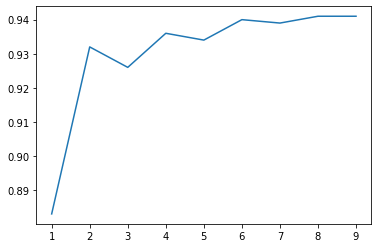

In [90]:
neighbors = [i for i in range(1,10)]
accuracy_list = run_knn(neighbors)
plt.plot(neighbors,accuracy_list)
plt.xlabel('N_neighbors')
plt.ylabel('Test Accuracy')